4. Um corpo de massa 1 kg move-se num oscilador quártico forçado. Se a posição de equilíbrio for a origem do
eixo xe=0


a) Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 3 m.
Tem confiança no seu resultado?

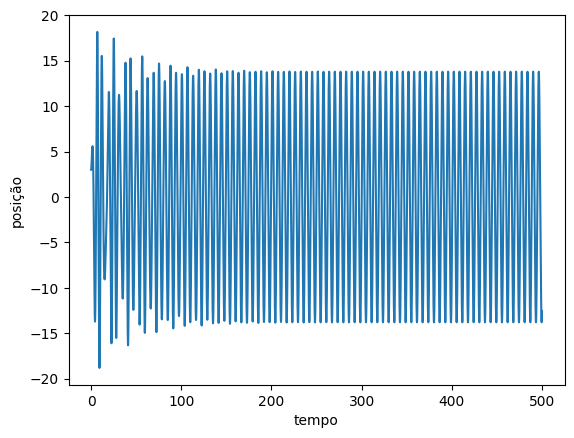

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Ex1
#a) lei do movimento e da velocidade
#dados: velocidade - 27.78
def euler():
    dt = 0.01
    tf = 500
    n = int(tf/dt+0.1)

    t = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)

    vx[0] = 0
    t[0] = 0
    x[0] = 3
    m=1
    k=1
    b=0.05
    F0=7.5
    wf=1
    alfa=0.002

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i]=(-(k/m)*x[i]*(1+2*alfa*x[i]**2))-((b/m)*vx[i])+((F0/m)*np.cos(wf*t[i]))
        vx[i+1] = vx[i]+ax[i]*dt
        x[i+1] = x[i]+vx[i+1]*dt

    return t, x, vx, n

t, x, vx, n = euler()

plt.plot(t,x)
plt.xlabel("tempo")
plt.ylabel("posição")
plt.show()



b) Calcule a amplitude do movimento e o seu período no regime estacionário, usando os resultados numéricos.


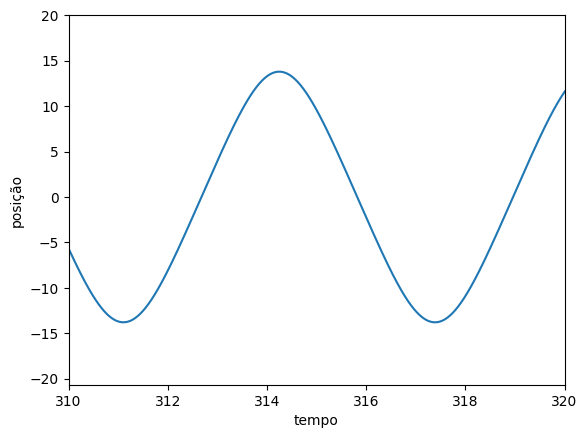

Amplitude: 13.80 m
Período: 6.87 s
Frequência: 0.15 Hz


In [116]:
plt.plot(t,x)
plt.xlabel("tempo")
plt.xlim(310,320)
plt.ylabel("posição")
plt.show()


#for i in range(n-1):
    #if(t[i+1]>317.37 and t[i+1]<317.5):
        #print(t[i+1])
        #print(x[i+1])
        #print("----------")


def maxminv(x0,x1,x2,y0,y1,y2): 
    # Máximo ou mínimo usando o polinómio de Lagrange
    # Dados (input): (x0,y0), (x1,y1) e (x2,y2) 
    # Resultados (output): xm, ymax
    xab=x0-x1
    xac=x0-x2
    xbc=x1-x2
    a=y0/(xab*xac)
    b=-y1/(xab*xbc)
    c=y2/(xac*xbc)
    xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2
    xm=0.5*xmla/(a+b+c)
    xta=xm-x0
    xtb=xm-x1
    xtc=xm-x2
    ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xm, ymax

#maximos
xm,ymax=maxminv(314.2399,314.2499,314.2599,13.7911,13.7917,13.7905)


#minimos
xmin,ymin=maxminv(317.3799,317.3899,317.99,-13.79026,-13.79098,-13.79002)

print(f'Amplitude: {(ymax-ymin)/2:.2f} m')
print(f'Período: {(xmin-xm)*2:.2f} s')
print(f'Frequência: {1 / ((xmin-xm)*2):.2f} Hz')


c) Calcule os coeficientes de Fourier da oscilação no regime estacionário

tempo: 251.4199999999163, posição: 13.802987392675837
index =  25142
tempo: 257.69999999991063, posição: 13.77823330632457
index =  25770


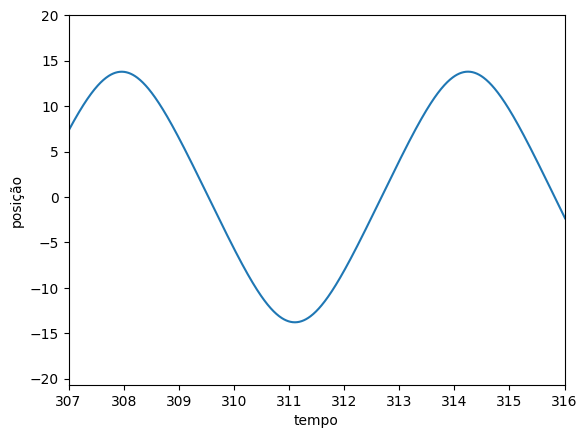

a=  13.110147502553138  ,b=  2.904221824816748


In [117]:
def abfourier(tp,xp,it0,it1,nf):
# cálculo dos coeficientes de Fourier a_nf e b_nf
# a_nf = 2/T integral ( xp cos( nf w) ) dt entre tp(it0) e tp(it1)
# b_nf = 2/T integral ( xp sin( nf w) ) dt entre tp(it0) e tp(it1) 
# integracao numerica pela aproximação trapezoidal
# input: matrizes tempo tp (abcissas)
# posição xp (ordenadas) 
# indices inicial it0
# final it1 (ao fim de um período) 
# nf índice de Fourier
# output: af_bf e bf_nf
    dt=tp[1]-tp[0]
    per=tp[it1]-tp[it0]
    ome=2*np.pi/per
    s1=xp[it0]*np.cos(nf*ome*tp[it0])
    s2=xp[it1]*np.cos(nf*ome*tp[it1])
    st=xp[it0+1:it1]*np.cos(nf*ome*tp[it0+1:it1])
    soma=np.sum(st)
    q1=xp[it0]*np.sin(nf*ome*tp[it0])
    q2=xp[it1]*np.sin(nf*ome*tp[it1])
    qt=xp[it0+1:it1]*np.sin(nf*ome*tp[it0+1:it1])
    somq=np.sum(qt)
    intega=((s1+s2)/2+soma)*dt
    af=2/per*intega
    integq=((q1+q2)/2+somq)*dt
    bf=2/per*integq
    return af,bf

for i in range(n-1):
    if t[i+1] > 251.4199 and t[i+1] < 251.42:
        print(f'tempo: {t[i+1]}, posição: {x[i+1]}')
        print("index = ",i+1)
        it0 = i+1

#máximo consecutivo index = 25770
for i in range(n-1):
    if t[i+1] > 257.699 and t[i+1] < 257.7:
        print(f'tempo: {t[i+1]}, posição: {x[i+1]}')
        print("index = ",i+1)
        it1 = i+1
nf=1
af,bf=abfourier(t,x,it0,it1,nf)

#307.9599999998649
#13.785435896318745 primeiro maximo

#314.2499999998592
#13.791705326786369 segundo maximo

plt.plot(t,x)
plt.xlabel("tempo")
plt.xlim(307,316)
plt.ylabel("posição")
plt.show()

#for i in range(n-1):
    #if(t[i+1]>314.2 and t[i+1]<315):
        #print(t[i+1])
        #print(x[i+1])
        #print("----------")

print("a= ",af," ,b= ",bf)

Um corpo de massa 1 kg move-se num oscilador quártico não harmónico forçado. Se a posição de equilíbrio for a 
origem do eixo xeq = 0 m, o oscilador tem a energia potencial

a) Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 3 m.


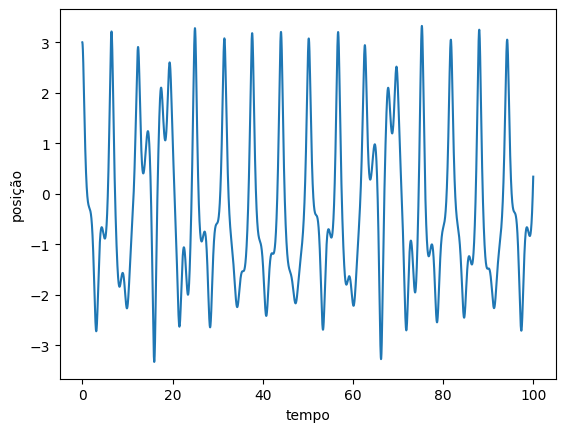

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Ex1
#a) lei do movimento e da velocidade
#dados: velocidade - 27.78
def euler():
    dt = 0.01
    tf = 100
    n = int(tf/dt+0.1)

    t = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)

    vx[0] = 0
    t[0] = 0
    x[0] = 3
    m=1
    k=1
    b=0.05
    F0=7.5
    wf=1
    alfa=0.25

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i]=((-4*alfa)*x[i]**3)-((b/m)*vx[i])+((F0/m)*np.cos(wf*t[i]))
        vx[i+1] = vx[i]+ax[i]*dt
        x[i+1] = x[i]+vx[i+1]*dt

    return t, x, vx, n

t1, x1, vx1, n1 = euler()

plt.plot(t1,x1)
plt.xlabel("tempo")
plt.ylabel("posição")
plt.show()



b) Calcule novamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 3.003 m.
O que observa?

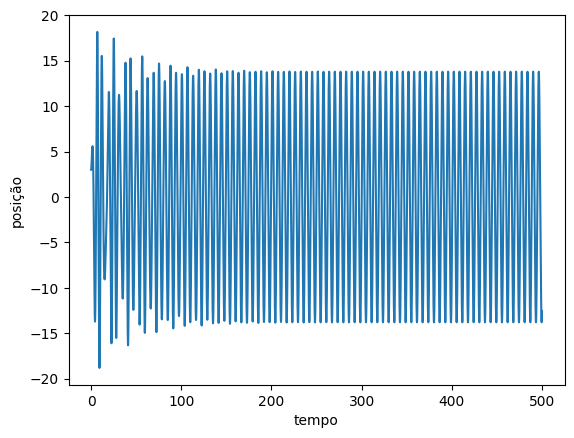

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Ex1
#a) lei do movimento e da velocidade
#dados: velocidade - 27.78
def euler():
    dt = 0.01
    tf = 100
    n = int(tf/dt+0.1)

    t = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)

    vx[0] = 0
    t[0] = 0
    x[0] = 3.003
    m=1
    k=1
    b=0.05
    F0=7.5
    wf=1
    alfa=0.25

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i]=((-4*alfa)*x[i]**3)-((b/m)*vx[i])+((F0/m)*np.cos(wf*t[i]))
        vx[i+1] = vx[i]+ax[i]*dt
        x[i+1] = x[i]+vx[i+1]*dt

    return t, x, vx, n

t2, x2, vx2, n2 = euler()

plt.plot(t,x)
plt.xlabel("tempo")
plt.ylabel("posição")
plt.show()



c) Faça o plot da trajetório no espaço de fase (vx(t) vs x(t) ) durante 100s, para os dois casos das alinhas a) e b).


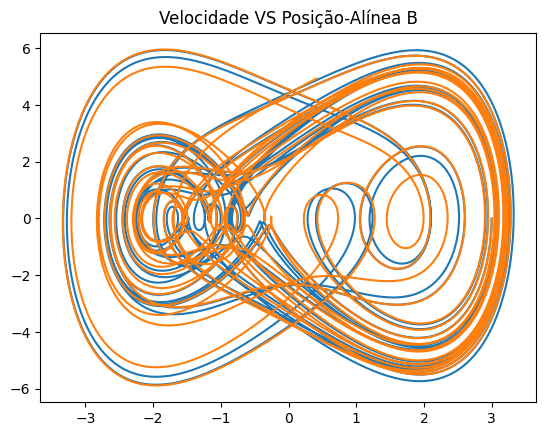

In [122]:
plt.title("Velocidade VS Posição-Alínea A")
plt.plot(x1,vx1)

plt.title("Velocidade VS Posição-Alínea B")
plt.plot(x2,vx2)

d) Repite alinhas a)-c) usando F0 = 0.5 N. O que se observa?


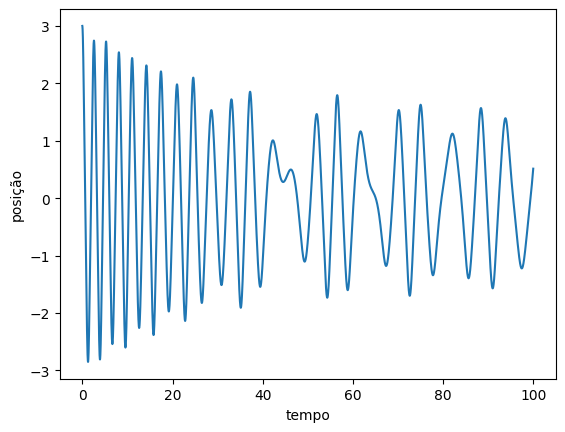

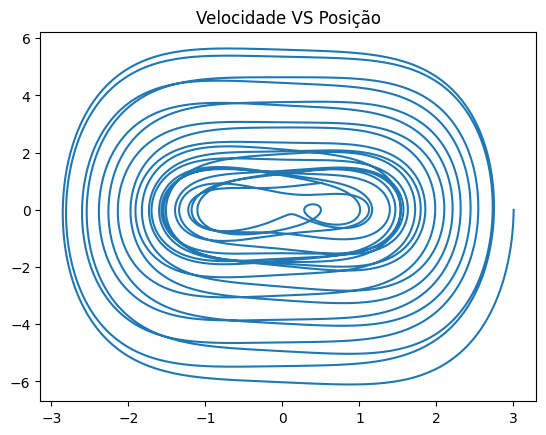

In [125]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Ex1
#a) lei do movimento e da velocidade
#dados: velocidade - 27.78
def euler():
    dt = 0.01
    tf = 100
    n = int(tf/dt+0.1)

    t = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)

    vx[0] = 0
    t[0] = 0
    x[0] = 3.003
    m=1
    k=1
    b=0.05
    F0=0.5
    wf=1
    alfa=0.25

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i]=((-4*alfa)*x[i]**3)-((b/m)*vx[i])+((F0/m)*np.cos(wf*t[i]))
        vx[i+1] = vx[i]+ax[i]*dt
        x[i+1] = x[i]+vx[i+1]*dt

    return t, x, vx, n

t, x, vx, n = euler()

plt.plot(t,x)
plt.xlabel("tempo")
plt.ylabel("posição")
plt.show()


plt.title("Velocidade VS Posição")
plt.plot(x,vx)